In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
fname = 'titanic_cleaned.csv'
df = pd.read_csv(fname)

In [4]:
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ind,New_fare,Family_Cnt
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,7.2500,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,71.2833,1
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,7.9250,0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,53.1000,1
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,8.0500,0


In [5]:
df.shape

(891, 16)

In [6]:
df.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Cabin_ind        0
New_fare         0
Family_Cnt       0
dtype: int64

In [7]:
col_needed = ['Pclass', 'Sex', 'Age', 'Cabin_ind', 'New_fare', 'Family_Cnt', 'Embarked'] #Add the columns needed
X = df[col_needed]
y = df['Survived'] # Add DV

In [8]:
X.shape

(891, 7)

In [9]:
X.head()

,Pclass,Sex,Age,Cabin_ind,New_fare,Family_Cnt,Embarked
0,3,male,22.0,0,7.2500,1,S
1,1,female,38.0,1,71.2833,1,C
2,3,female,26.0,0,7.9250,0,S
3,1,female,35.0,1,53.1000,1,S
4,3,male,35.0,0,8.0500,0,S


In [10]:
#Create Dummies for Qualitative/Categorical Variables
X = pd.get_dummies(X, columns = ['Pclass', 'Sex', 'Embarked'],drop_first=True)

In [11]:
X.head()

,Age,Cabin_ind,New_fare,Family_Cnt,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,0,7.2500,1,0,1,1,0,1
1,38.0,1,71.2833,1,0,0,0,0,0
2,26.0,0,7.9250,0,0,1,0,0,1
3,35.0,1,53.1000,1,0,0,0,0,1
4,35.0,0,8.0500,0,0,1,1,0,1


In [12]:
#Drop Sex_female column
X.drop('Sex_female', axis = 1, inplace = True)

KeyError: "['Sex_female'] not found in axis"

In [13]:
X.head()

,Age,Cabin_ind,New_fare,Family_Cnt,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,0,7.2500,1,0,1,1,0,1
1,38.0,1,71.2833,1,0,0,0,0,0
2,26.0,0,7.9250,0,0,1,0,0,1
3,35.0,1,53.1000,1,0,0,0,0,1
4,35.0,0,8.0500,0,0,1,1,0,1


In [14]:
#Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 432)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 9)
(712,)
(179, 9)
(179,)


In [16]:
179/(712+179)

0.20089786756453423

In [16]:
#step 1: import the model
#step 2: instantiate the class
#step 3: fit the model
#step 4: predict
#step 5: evaluate

In [17]:
#load logistic regression
from sklearn.linear_model import LogisticRegression

In [18]:
#instantiate and fit the model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [19]:
# Age, Cabin_ind, New_fare, Family_Cnt, Pclass_1, Pclass_2, Pclass_3, Sex_male
lr_model.coef_

array([[-0.03637553,  1.13504338,  0.01251442, -0.30318945,  0.5602811 ,
        -0.32199846, -2.57260538, -0.25616483, -0.61648984]])

In [20]:
#Predict for test dataset
predictions = lr_model.predict(X_test)

In [21]:
predictions

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [22]:
y_test[:10]

326    0
618    1
11     1
154    0
415    0
463    0
552    0
746    0
303    1
72     0
Name: Survived, dtype: int64

In [24]:
#How about probabilities prediction
lr_model.predict_proba(X_test[:10])

array([[0.96550811, 0.03449189],
       [0.05628053, 0.94371947],
       [0.25947776, 0.74052224],
       [0.89955132, 0.10044868],
       [0.40381706, 0.59618294],
       [0.87039977, 0.12960023],
       [0.86121975, 0.13878025],
       [0.89458078, 0.10541922],
       [0.05619745, 0.94380255],
       [0.54121542, 0.45878458]])

In [26]:
#Use .score function to get the accuracy of the model
print('training accuracy:', lr_model.score(X_train, y_train))
print('test accuracy:', lr_model.score(X_test, y_test))

training accuracy: 0.8117977528089888
test accuracy: 0.8044692737430168


In [28]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[91 13]
 [22 53]]


<Axes: >

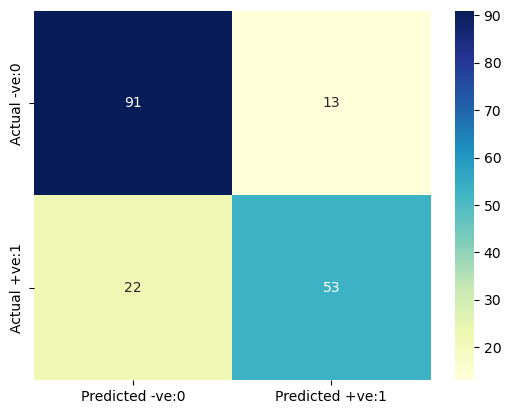

In [27]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted -ve:0', 'Predicted +ve:1'],
                                 index=['Actual -ve:0', 'Actual +ve:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       104
           1       0.80      0.71      0.75        75

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



## Decision Trees

In [30]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

In [31]:
#Instantiate the model
ctree = DecisionTreeClassifier(max_depth = 3, random_state= 0)

In [32]:
#Train/fit the model
ctree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

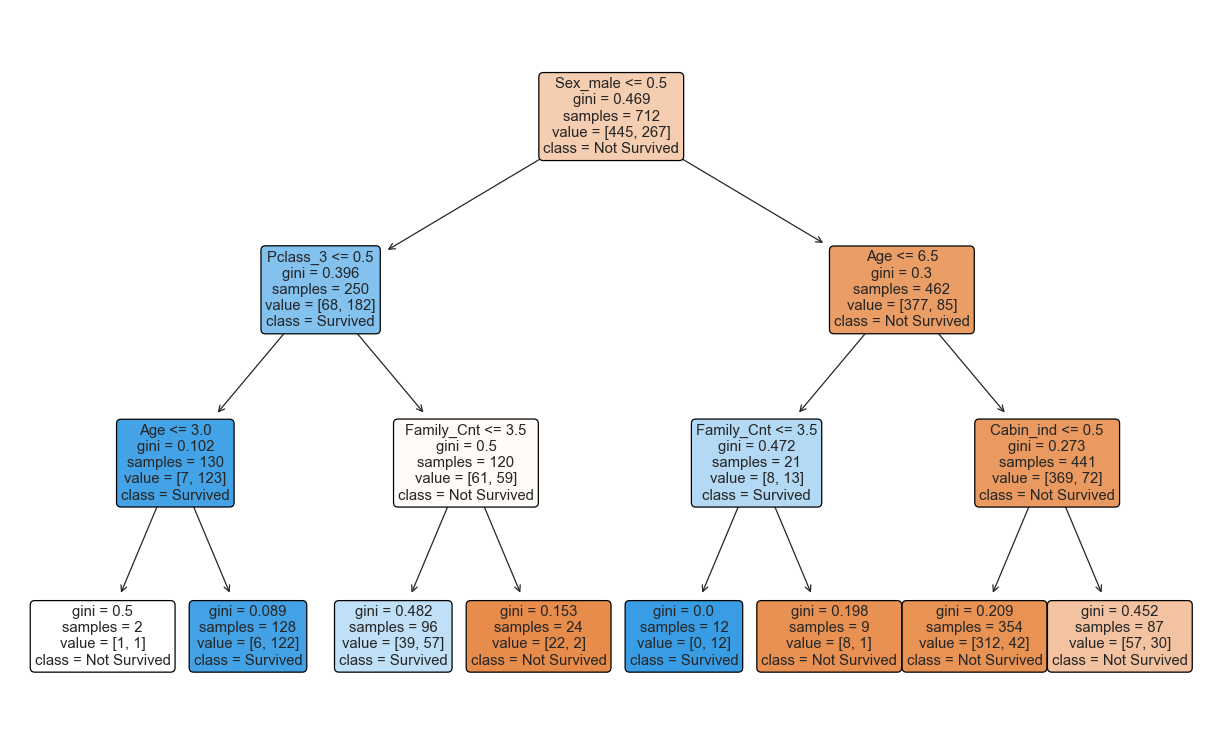

In [33]:
plt.style.use("seaborn")
fig = plt.figure(figsize = (5,3), dpi = 300)
_ = plot_tree(ctree,
              feature_names = X.columns,
              impurity = True,
              class_names = ['Not Survived', 'Survived'],
              filled = True,
              rounded = True)
plt.show()

In [38]:
#Predict the output
predictions = ctree.predict(X_test)

In [39]:
#Evaluate
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.8100558659217877


In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[93 11]
 [23 52]]


In [41]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85       104
           1       0.83      0.69      0.75        75

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



## Full Grown Tree

In [46]:
#Instantiate the model
full_tree = DecisionTreeClassifier(random_state= 0)

In [51]:
#Train/fit the model
full_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

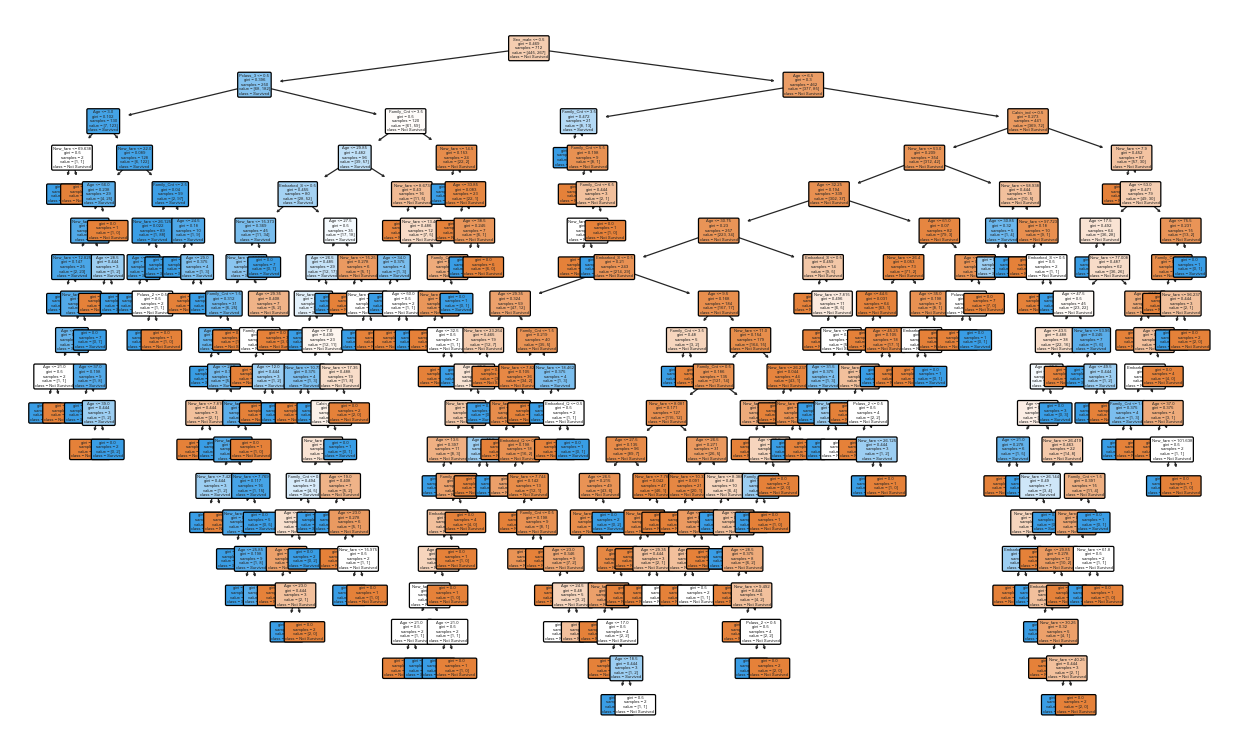

In [52]:
plt.style.use("seaborn")
fig = plt.figure(figsize = (5,3), dpi = 300)
_ = plot_tree(full_tree,
              feature_names = X.columns,
              impurity = True,
              class_names = ['Not Survived', 'Survived'],
              filled = True,
              rounded = True)
plt.show()

In [54]:
#Use .score function to get the accuracy of the model
print('training accuracy:', full_tree.score(X_train, y_train))
print('test accuracy:', full_tree.score(X_test, y_test))

training accuracy: 0.9859550561797753
test accuracy: 0.8100558659217877


In [55]:
full_tree.get_depth()

18

##Small Tree

In [58]:
#Instantiate the model
small_tree = DecisionTreeClassifier(max_depth = 1, random_state= 0)

In [59]:
#Train/fit the model
small_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=0)

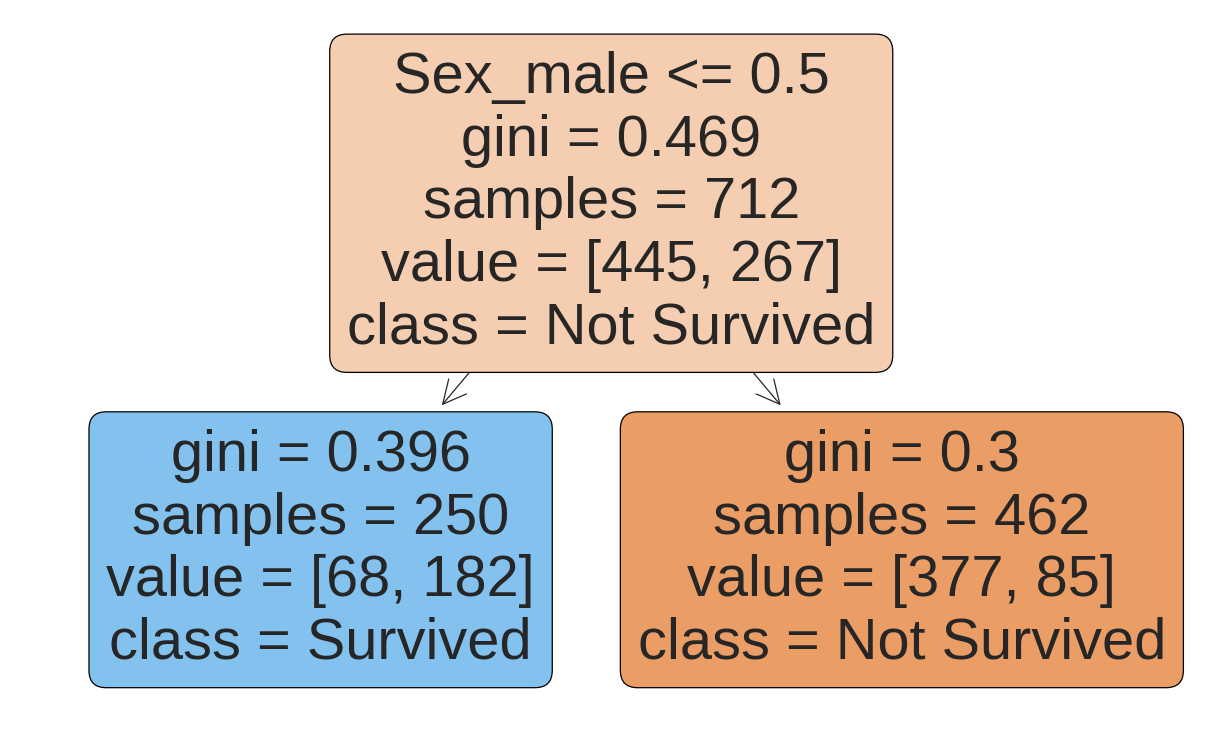

In [44]:
plt.style.use("seaborn")
fig = plt.figure(figsize = (5,3), dpi = 300)
_ = plot_tree(small_tree,
              feature_names = X.columns,
              impurity = True,
              class_names = ['Not Survived', 'Survived'],
              filled = True,
              rounded = True)
plt.show()

In [63]:
#Use .score function to get the accuracy of the model
print('training accuracy:', small_tree.score(X_train, y_train))
print('test accuracy:', small_tree.score(X_test, y_test))

training accuracy: 0.7851123595505618
test accuracy: 0.7932960893854749


## Hyperparameter Tunining Using GridSearchCV

In [64]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [65]:
#A function to print gridsearch results

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [66]:
#Start with an initial guess for params

param_grid = {
    'max_depth': [5, 8, 10, 15, 20, 25],
    'min_samples_split': [10, 15, 20, 30, 40, 50, 60],
    'min_impurity_decrease' : [0, 0.0005, 0.001, 0.005, 0.01],
    'criterion' :['gini', 'entropy']
}

In [67]:
gridsearch = GridSearchCV( DecisionTreeClassifier(random_state = 0),
                          param_grid,
                           cv = 5,
                           n_jobs = -1
)

gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 8, 10, 15, 20, 25],
                         'min_impurity_decrease': [0, 0.0005, 0.001, 0.005,
                                                   0.01],
                         'min_samples_split': [10, 15, 20, 30, 40, 50, 60]})

In [69]:
print_results(gridsearch)

BEST PARAMS: {'criterion': 'gini', 'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 15}

0.791 (+/-0.032) for {'criterion': 'gini', 'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 10}
0.789 (+/-0.027) for {'criterion': 'gini', 'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 15}
0.788 (+/-0.027) for {'criterion': 'gini', 'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 20}
0.779 (+/-0.038) for {'criterion': 'gini', 'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 30}
0.779 (+/-0.037) for {'criterion': 'gini', 'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 40}
0.779 (+/-0.037) for {'criterion': 'gini', 'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 50}
0.779 (+/-0.037) for {'criterion': 'gini', 'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 60}
0.791 (+/-0.032) for {'criterion': 'gini', 'max_depth': 5, 'min_impurity_decrease': 0.0005, 'min_samples_split

In [70]:
print("Model Score:", gridsearch.best_score_)
print("Model Parameters:", gridsearch.best_params_)

Model Score: 0.8118093174431202
Model Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 15}


In [71]:
#Best tree is
bestCtree = gridsearch.best_estimator_

In [74]:
predictions = bestCtree.predict(X_test)

In [75]:
print(accuracy_score(y_test, predictions))

0.8212290502793296


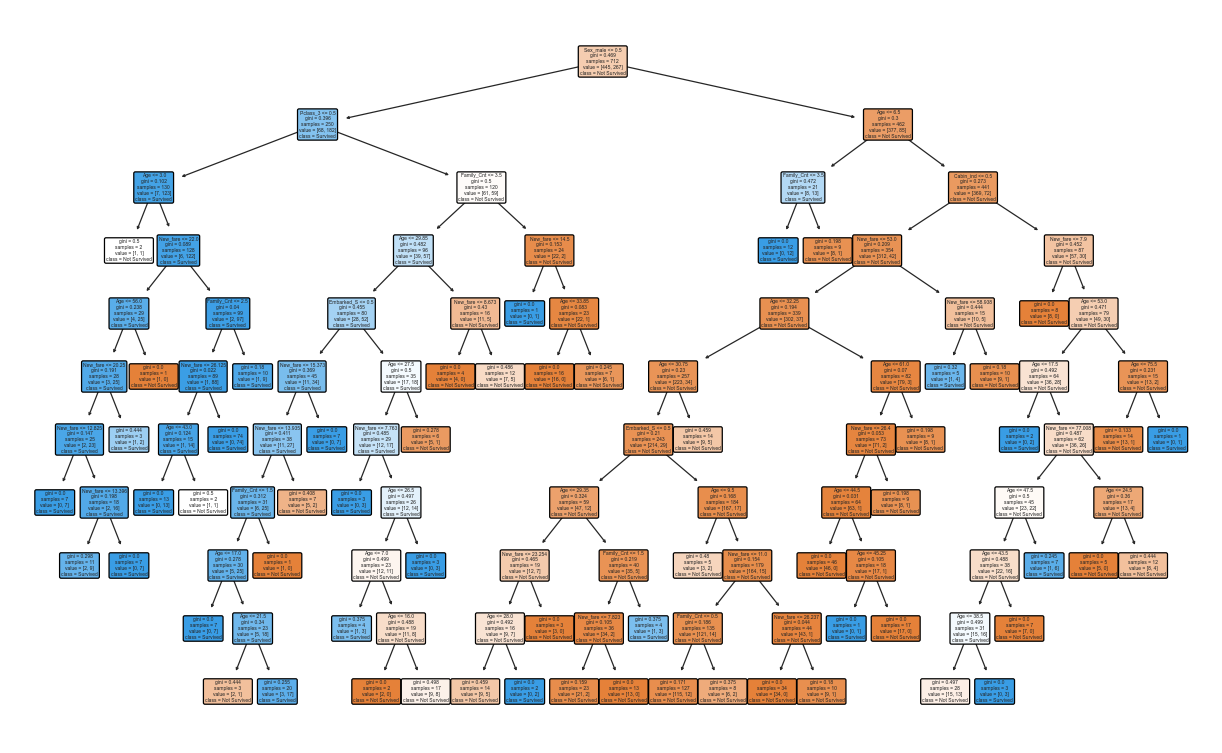

In [76]:
plt.style.use("seaborn")
fig = plt.figure(figsize = (5,3), dpi = 300)
_ = plot_tree(bestCtree,
              feature_names = X.columns,
              impurity = True,
              class_names = ['Not Survived', 'Survived'],
              filled = True,
              rounded = True)
plt.show()

## Post Pruning (CCP)

In [77]:
param_grid_ccp = {
    'ccp_alpha' : [0.001, 0.005,  0.01,  0.05, 0.1]
}

In [78]:
gridsearch_ccp = GridSearchCV( DecisionTreeClassifier(random_state = 0),
                          param_grid_ccp,
                           cv = 5,
                           n_jobs = -1
)

gridsearch_ccp.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'ccp_alpha': [0.001, 0.005, 0.01, 0.05, 0.1]})

In [79]:
print_results(gridsearch_ccp)

BEST PARAMS: {'ccp_alpha': 0.005}

0.767 (+/-0.06) for {'ccp_alpha': 0.001}
0.798 (+/-0.04) for {'ccp_alpha': 0.005}
0.795 (+/-0.053) for {'ccp_alpha': 0.01}
0.785 (+/-0.079) for {'ccp_alpha': 0.05}
0.785 (+/-0.079) for {'ccp_alpha': 0.1}


In [80]:
#Best tree is
bestCtree = gridsearch_ccp.best_estimator_

In [81]:
predictions = bestCtree.predict(X_test)

In [82]:
print(accuracy_score(y_test, predictions))

0.8156424581005587


## Ensemble Learning

## Voting

In [83]:
#import different models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#import voting classifier
from sklearn.ensemble import VotingClassifier

In [84]:
#create an object for all the models

log_clf = LogisticRegression()
dtr_clf = DecisionTreeClassifier()
svm_clf = SVC(probability = True)

In [85]:
#create an object Voting Classifier
voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('dt',dtr_clf), ('svc', svm_clf)],
    voting = 'soft',
    weights = [1,1,1]
)

In [86]:
#hard voting [1 1 0 = 1 ]
#Soft voting [0.51, 0.55, 0.10]
(0.51 +0.55 + 0.10) / 3

0.3866666666666667

In [87]:
#fit the model
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft', weights=[1, 1, 1])

In [89]:
for clf in (log_clf, dtr_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8044692737430168
DecisionTreeClassifier 0.8212290502793296
SVC 0.6424581005586593
VotingClassifier 0.8435754189944135


#Bagging and Pasting

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [100]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators = 500,
    max_samples = 100,
    bootstrap= True, #True: Bagging; False: Pasting
    n_jobs = -1,
    random_state = 0,
    oob_score = True
)

In [108]:
bag_clf.oob_score_

0.8132022471910112

In [110]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, oob_score=True, random_state=0)

In [112]:
bag_pred = bag_clf.predict(X_test)

In [94]:
print(accuracy_score(y_test, bag_pred))

0.8156424581005587


## Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
rnd_clf = RandomForestClassifier(
    n_estimators= 500,
    max_depth = 10,
    n_jobs = -1,
    random_state = 1
)


In [118]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=500, n_jobs=-1,
                       random_state=1)

In [119]:
rf_pred = rnd_clf.predict(X_test)

In [120]:
print(accuracy_score(y_test, rf_pred))

0.8547486033519553


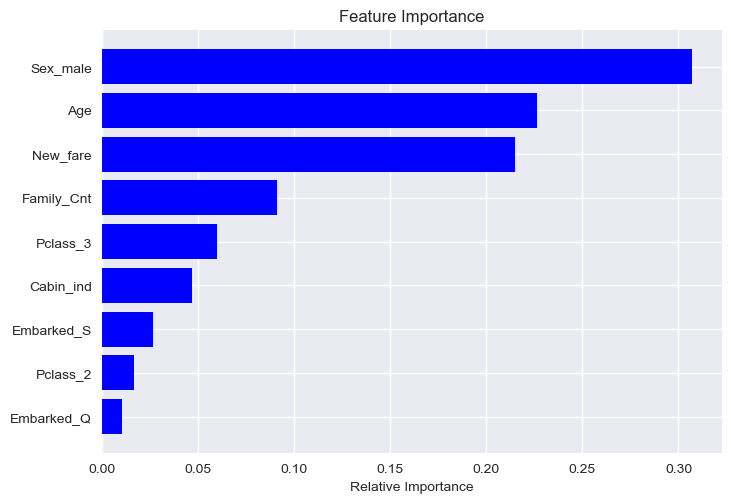

In [121]:
#Get the feature importance

features = X_test.columns
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.title("Feature Importance")
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [122]:
param_grid = {
    'n_estimators':[50, 75, 100, 200, 300, 400, 500],
    'max_depth' : [5, 7, 8, 10, 12, 15]
}

gridsearch = GridSearchCV( RandomForestClassifier(random_state = 1),
                          param_grid,
                          cv = 5,
                          n_jobs = -1

)

gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 8, 10, 12, 15],
                         'n_estimators': [50, 75, 100, 200, 300, 400, 500]})

In [124]:
print_results(gridsearch)

BEST PARAMS: {'max_depth': 5, 'n_estimators': 300}

0.798 (+/-0.029) for {'max_depth': 5, 'n_estimators': 50}
0.801 (+/-0.032) for {'max_depth': 5, 'n_estimators': 75}
0.802 (+/-0.029) for {'max_depth': 5, 'n_estimators': 100}
0.805 (+/-0.028) for {'max_depth': 5, 'n_estimators': 200}
0.808 (+/-0.041) for {'max_depth': 5, 'n_estimators': 300}
0.805 (+/-0.029) for {'max_depth': 5, 'n_estimators': 400}
0.803 (+/-0.024) for {'max_depth': 5, 'n_estimators': 500}
0.798 (+/-0.047) for {'max_depth': 7, 'n_estimators': 50}
0.803 (+/-0.042) for {'max_depth': 7, 'n_estimators': 75}
0.798 (+/-0.048) for {'max_depth': 7, 'n_estimators': 100}
0.801 (+/-0.036) for {'max_depth': 7, 'n_estimators': 200}
0.802 (+/-0.03) for {'max_depth': 7, 'n_estimators': 300}
0.802 (+/-0.032) for {'max_depth': 7, 'n_estimators': 400}
0.803 (+/-0.029) for {'max_depth': 7, 'n_estimators': 500}
0.802 (+/-0.057) for {'max_depth': 8, 'n_estimators': 50}
0.802 (+/-0.055) for {'max_depth': 8, 'n_estimators': 75}
0.796 (+/-0

In [111]:
print('best score', gridsearch.best_score_)
print('best parameter', gridsearch.best_params_)

best score 0.8117797695262483
best parameter {'max_depth': 7, 'n_estimators': 50}


In [112]:
best_rf = gridsearch.best_estimator_

In [113]:
pred_rf = best_rf.predict(X_test)

In [114]:
print(accuracy_score(y_test, pred_rf))

0.8156424581005587


## Adaboost

In [126]:
from sklearn.ensemble import AdaBoostClassifier

In [127]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(),
    n_estimators = 200,
    learning_rate = 0.05,
    random_state = 1
)

In [128]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.05,
                   n_estimators=200, random_state=1)

In [129]:
ada_pred = ada_clf.predict(X_test)

In [130]:
accuracy_score(y_test, ada_pred)

0.7932960893854749

In [131]:
param_grid = {
    'n_estimators':[50, 75, 100, 200, 300, 400, 500],
    'learning_rate' : [0.005, 0.01, 0.05, 0.1, 0.2, 0.3]
}

gridsearch_ada = GridSearchCV(AdaBoostClassifier( DecisionTreeClassifier(max_depth =1), random_state = 1),
                          param_grid,
                          cv = 5,
                          n_jobs = -1

)

gridsearch_ada.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.005, 0.01, 0.05, 0.1, 0.2, 0.3],
                         'n_estimators': [50, 75, 100, 200, 300, 400, 500]})

In [132]:
print('best score', gridsearch_ada.best_score_)
print('best parameter', gridsearch_ada.best_params_)

best score 0.8103614695163991
best parameter {'learning_rate': 0.05, 'n_estimators': 200}


In [133]:
best_ada = gridsearch_ada.best_estimator_

In [134]:
pred_ada = best_ada.predict(X_test)

In [135]:
print(accuracy_score(y_test, pred_ada))

0.8156424581005587


# XGBOOST

In [136]:
#!pip install xgboost
import xgboost

In [139]:
xgb_clf = xgboost.XGBClassifier()

In [140]:
xgb_clf.fit(X_train, y_train, eval_set = [(X_test, y_test)], early_stopping_rounds = 2)


[0]	validation_0-logloss:0.55977
[1]	validation_0-logloss:0.48683
[2]	validation_0-logloss:0.44327
[3]	validation_0-logloss:0.41900
[4]	validation_0-logloss:0.40470
[5]	validation_0-logloss:0.39735
[6]	validation_0-logloss:0.39289
[7]	validation_0-logloss:0.39057
[8]	validation_0-logloss:0.39005
[9]	validation_0-logloss:0.38875
[10]	validation_0-logloss:0.38589
[11]	validation_0-logloss:0.38989
[12]	validation_0-logloss:0.39205


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [160]:
xgb_pred = xgb_clf.predict(X_test)

In [161]:
print(accuracy_score(y_test, xgb_pred))

0.8435754189944135
